## Linearized Likes

In [3]:
import pandas as pd
import pandahouse as ph
from scipy import stats
import hashlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
connection = {'host' : 'https://clickhouse.lab.karpov.courses',
              'database' : 'simulator_20220820',
              'user' : 'student',
              'password' : 'dpo_python_2020'
             }

query = '''
    SELECT user_id,
           countIf(user_id, action = 'like' ) as like,
           countIf(user_id, action = 'view' ) as view,
           like/view as CTR,
           exp_group
      FROM {db}.feed_actions
      WHERE toDate(time) >= '2022-07-13' and toDate(time) <= '2022-07-19'
      GROUP BY user_id, exp_group
      '''

df = ph.read_clickhouse(query, connection = connection)

–í–º–µ—Å—Ç–æ —Ç–æ–≥–æ, —á—Ç–æ–±—ã –∑–∞—Ç–∞–ª–∫–∏–≤–∞—Ç—å –≤ —Ç–µ—Å—Ç ¬´–ø–æ—é–∑–µ—Ä–Ω—ã–µ¬ª CTR, –º–æ–∂–Ω–æ —Å–∫–æ–Ω—Å—Ç—Ä—É–∏—Ä–æ–≤–∞—Ç—å –¥—Ä—É–≥—É—é –º–µ—Ç—Ä–∏–∫—É –∏ –∞–Ω–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å –µ–µ, –Ω–æ –ø—Ä–∏ —ç—Ç–æ–º –≥–∞—Ä–∞–Ω—Ç–∏—Ä—É–µ—Ç—Å—è (–≤ –æ—Ç–ª–∏—á–∏–µ –æ—Ç —Å–≥–ª–∞–∂–µ–Ω–Ω–æ–≥–æ CTR), —á—Ç–æ –µ—Å–ª–∏ —Ç–µ—Å—Ç –Ω–∞ —ç—Ç–æ–π –¥—Ä—É–≥–æ–π –º–µ—Ç—Ä–∏–∫–µ ¬´–ø—Ä–æ–∫—Ä–∞—Å–∏—Ç—Å—è¬ª –∏ —É–≤–∏–¥–∏—Ç –∏–∑–º–µ–Ω–µ–Ω–∏—è, –∑–Ω–∞—á–∏—Ç –∏–∑–º–µ–Ω–µ–Ω–∏—è –µ—Å—Ç—å –∏ –≤ –º–µ—Ç—Ä–∏–∫–µ –∏—Å—Ö–æ–¥–Ω–æ–π (—Ç–æ –µ—Å—Ç—å –≤ –ª–∞–π–∫–∞—Ö –Ω–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è –∏ –≤ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏—Ö CTR

–ü—Ä–∏ —ç—Ç–æ–º –º–µ—Ç–æ–¥ —Å–∞–º –ø–æ —Å–µ–±–µ –æ—á–µ–Ω—å –ø—Ä–æ—Å—Ç. –ß—Ç–æ —ç—Ç–æ –∑–∞ –º–µ—Ç—Ä–∏–∫–∞ —Ç–∞–∫–∞—è?

- –°—á–∏—Ç–∞–µ–º –æ–±—â–∏–π CTR –≤ –∫–æ–Ω—Ç—Ä–æ–ª—å–Ω–æ–π –≥—Ä—É–ø–ø–µ  ùê∂ùëáùëÖùëêùëúùëõùë°ùëüùëúùëô=ùë†ùë¢ùëö(ùëôùëñùëòùëíùë†)/ùë†ùë¢ùëö(ùë£ùëñùëíùë§ùë†) 
- –ü–æ—Å—á–∏—Ç–∞–µ–º –≤ –æ–±–µ–∏—Ö –≥—Ä—É–ø–ø–∞—Ö –ø–æ—é–∑–µ—Ä–Ω—É—é –º–µ—Ç—Ä–∏–∫—É  ùëôùëñùëõùëíùëéùëüùëñùëßùëíùëë_ùëôùëñùëòùëíùë†=ùëôùëñùëòùëíùë†‚àíùê∂ùëáùëÖùëêùëúùëõùë°ùëüùëúùëô‚àóùë£ùëñùëíùë§ùë† 
- –ü–æ—Å–ª–µ —á–µ–≥–æ —Å—Ä–∞–≤–Ω–∏–º  t-—Ç–µ—Å—Ç–æ–º –æ—Ç–ª–∏—á–∏—è –≤ –≥—Ä—É–ø–ø–∞—Ö –ø–æ –º–µ—Ç—Ä–∏–∫–µ ùëôùëñùëõùëíùëéùëüùëñùëßùëíùëë_ùëôùëñùëòùëíùë†  
- –ú–µ—Ç–æ–¥ –ø—Ä–æ—Å—Ç–æ–π, –≥–∞—Ä–∞–Ω—Ç–∏—Ä—É–µ—Ç—Å—è, —á—Ç–æ –ø—Ä–∏ –ø—Ä–∏–ª–∏—á–Ω–æ–º —Ä–∞–∑–º–µ—Ä–µ –≤—ã–±–æ—Ä–∫–∏ (–∫–∞–∫ —É –Ω–∞—Å ‚Äî –ø–æ–¥–æ–π–¥–µ—Ç) –º–æ–∂–Ω–æ –±–µ—Å–ø–ª–∞—Ç–Ω–æ —É–≤–µ–ª–∏—á–∏—Ç—å —á—É–≤—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –≤–∞—à–µ–π –º–µ—Ç—Ä–∏–∫–∏ (–∏–ª–∏, –ø–æ –∫—Ä–∞–π–Ω–µ–π –º–µ—Ä–µ, –Ω–µ —Å–¥–µ–ª–∞—Ç—å —Ö—É–∂–µ). –ö–∞–∫ –ø–æ –º–Ω–µ, —ç—Ç–æ –û–ß–ï–ù–¨ –∫—Ä—É—Ç–æ.

**–ó–∞–¥–∞—á–∞**

1. –ü—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä—É–π—Ç–µ —Ç–µ—Å—Ç –º–µ–∂–¥—É –≥—Ä—É–ø–ø–∞–º–∏ 0 –∏ 3 –ø–æ –º–µ—Ç—Ä–∏–∫–µ –ª–∏–Ω–µ–∞—Ä–∏–∑–æ–≤–∞–Ω–Ω—ã—Ö –ª–∞–π–∫–æ–≤. –í–∏–¥–Ω–æ –ª–∏ –æ—Ç–ª–∏—á–∏–µ? –°—Ç–∞–ª–æ –ª–∏ ùëù‚àíùë£ùëéùëôùë¢ùëí –º–µ–Ω—å—à–µ?
2. –ü—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä—É–π—Ç–µ —Ç–µ—Å—Ç –º–µ–∂–¥—É –≥—Ä—É–ø–ø–∞–º–∏ 1 –∏ 2 –ø–æ –º–µ—Ç—Ä–∏–∫–µ –ª–∏–Ω–µ–∞—Ä–∏–∑–æ–≤–∞–Ω–Ω—ã—Ö –ª–∞–π–∫–æ–≤. –í–∏–¥–Ω–æ –ª–∏ –æ—Ç–ª–∏—á–∏–µ? –°—Ç–∞–ª–æ –ª–∏ ùëù‚àíùë£ùëéùëôùë¢ùëí –º–µ–Ω—å—à–µ?

#### –ù–µ–±–æ–ª—å—à–æ–π —Ä–∞–∑–≤–µ–¥–æ—á–Ω—ã–π –∞–Ω–∞–ª–∏–∑

In [5]:
df_g = df.query('exp_group == 0 | exp_group == 3')
df_g1 = df.query('exp_group == 1 | exp_group == 2')

In [4]:
df_g, df_g1

(       user_id  like  view       CTR  exp_group
 0       115383     9    30  0.300000          3
 2       123580    13    48  0.270833          3
 7        30319    21   110  0.190909          0
 9       118359     7    38  0.184211          3
 11        7626    14    39  0.358974          0
 ...        ...   ...   ...       ...        ...
 50130   110492     4    17  0.235294          0
 50143   136299    35   116  0.301724          0
 50144    27030     8    39  0.205128          0
 50145   122758    30   198  0.151515          3
 50147   122190    19    65  0.292308          3
 
 [20048 rows x 5 columns],
        user_id  like  view       CTR  exp_group
 1        18392     7    32  0.218750          1
 3       131473    14   134  0.104478          2
 5        32420    26   128  0.203125          2
 6        24239    40    90  0.444444          2
 8        27443     2    29  0.068966          1
 ...        ...   ...   ...       ...        ...
 50138    21697     2    22  0.090909   

In [5]:
df_g.groupby('exp_group')['CTR'].agg(['mean', 'median', 'count', 'sum'])

mean    median  count          sum
exp_group                                        
0          0.215950  0.202899   9999  2159.280550
3          0.232624  0.220339  10049  2337.637663

In [6]:
df_g1.groupby('exp_group')['CTR'].agg(['mean', 'median', 'count', 'sum'])

mean    median  count          sum
exp_group                                        
1          0.215605  0.203125  10079  2173.078747
2          0.214419  0.142857   9952  2133.900610

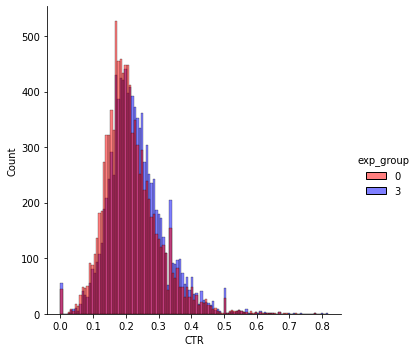

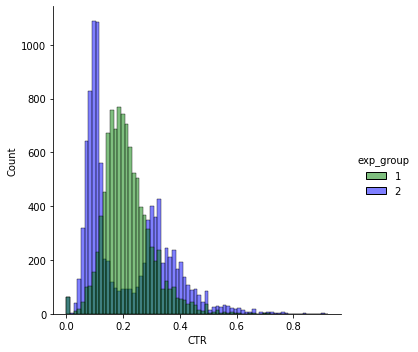

In [7]:
sns.displot(x='CTR',
            hue ='exp_group',
            data=df_g,
            palette = ['r', 'b']);

sns.displot(x='CTR',
            hue ='exp_group',
            data=df_g1,
            palette = ['g', 'b']);

<AxesSubplot:xlabel='exp_group', ylabel='CTR'>

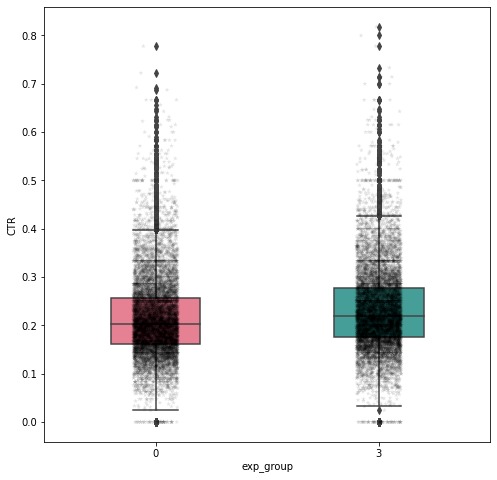

In [8]:
fig = plt.subplots(1,1, figsize=(8, 8))

sns.boxplot(data = df_g,
            x = 'exp_group',
            y = 'CTR',
            palette = 'husl',
            width=0.4)
sns.stripplot(data = df_g, 
                        x= "exp_group",
                        y = "CTR",
                        marker="*",
                        alpha=0.1,
                        color="black")

#### –ú–µ—Ç–æ–¥ –ª–∏–Ω–µ–∞—Ä–∏–∑–∞—Ü–∏–∏

In [15]:
gr_sm_0 = df_g[df_g.exp_group == 0].copy()
gr_sm_3 = df_g[df_g.exp_group == 3].copy()
gr_sm_1 = df_g1[df_g1.exp_group == 1].copy()
gr_sm_2 = df_g1[df_g1.exp_group == 2].copy()

In [16]:
CTR_glob = gr_sm_0['like'].sum() / gr_sm_0['view'].sum()
Linear_0 = gr_sm_0['like'] - CTR_glob * gr_sm_0['view']
Linear_3 = gr_sm_3['like'] - CTR_glob * gr_sm_3['view']

In [33]:
CTR_glob = gr_sm_1['like'].sum() / gr_sm_1['view'].sum()
Linear_1 = gr_sm_1['like'] - CTR_glob * gr_sm_1['view']
Linear_2 = gr_sm_2['like'] - CTR_glob * gr_sm_2['view']

/nfs/env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

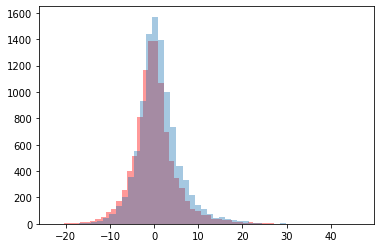

In [29]:
sns.distplot(Linear_0,
             kde = False,
             color = 'r')
sns.distplot(Linear_3,
             kde = False)

<AxesSubplot:>

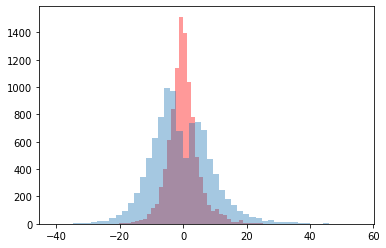

In [34]:
sns.distplot(Linear_1,
             kde = False,
             color = 'r')
sns.distplot(Linear_2,
             kde = False)

#### t-test

–ü–µ—Ä–≤—ã–π —Ç–µ—Å—Ç –∏–¥–µ—Ç –Ω–∞ –ª–∏–Ω–µ–∞—Ä–∏–∑–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö, –∞ –≤—Ç–æ—Ä–æ–π - –Ω–∞ –æ–±—ã—á–Ω—ã—Ö.

In [35]:
stats.ttest_ind(Linear_0, Linear_3, equal_var = False)

Ttest_indResult(statistic=-15.214995460903827, pvalue=5.4914249479690016e-52)

In [20]:
stats.ttest_ind(df_g.query('exp_group == 0')['CTR'], df_g.query('exp_group == 3')['CTR'], equal_var = False)

Ttest_indResult(statistic=-13.896870721904069, pvalue=1.055849414662529e-43)

In [36]:
stats.ttest_ind(Linear_1, Linear_2, equal_var = False)

Ttest_indResult(statistic=6.122579994775972, pvalue=9.439432187037712e-10)

In [38]:
stats.ttest_ind(df_g1.query('exp_group == 1')['CTR'], df_g1.query('exp_group == 2')['CTR'], equal_var = False)

Ttest_indResult(statistic=0.7094392041270485, pvalue=0.4780623130874935)

–î–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ, –æ—á–µ–Ω—å –∫—Ä—É—Ç–æ. –û—Å–æ–±–µ–Ω–Ω–æ –Ω–∞–≥–ª—è–¥–Ω–æ –≤–∏–¥–Ω–∞ —Ä–∞–∑–Ω–∏—Ü–∞ –≤ —Ä–∞–±–æ—Ç–µ –º–µ—Ç—Ä–∏–∫–∏ –Ω–∞ 1 –∏ 2 –≥—Ä—É–ø–ø–∞—Ö, –≥–¥–µ –∏–∑–Ω–∞—á–∞–ª—å–Ω–æ t-test –Ω–µ –º–æ–≥ —É–ª–æ–≤–∏—Ç—å —Ä–∞–∑–Ω–∏—Ü—É –≤ –≤—ã–±–æ—Ä–∫–∞—Ö.

**–§—É–Ω–∫—Ü–∏—è –ª–∏–Ω–µ–∞—Ä–∏–∑–∞—Ü–∏–∏**

In [7]:
def linearization_likes(likes_0, views_0, likes_1, views_1):
    """
    –§—É–Ω–∫—Ü–∏—è –ª–∏–Ω–µ–∞—Ä–∏–∑–∞—Ü–∏–∏ –ª–∞–π–∫–æ–≤
    --------------------
    –ü–∞—Ä–∞–º–µ—Ç—Ä—ã:
    likes_0 - –ª–∞–π–∫–∏ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –∫–æ–Ω—Ç—Ä–æ–ª—å–Ω–æ–π –≥—Ä—É–ø–ø—ã
    views_0 - –ø—Ä–æ—Å–º–æ—Ç—Ä—ã –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –∫–æ–Ω—Ç—Ä–æ–ª—å–Ω–æ–π –≥—Ä—É–ø–ø—ã
    likes_1 - –ª–∞–π–∫–∏ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞–ª—å–Ω–æ–π –≥—Ä—É–ø–ø—ã
    views_1 - –ø—Ä–æ—Å–º–æ—Ç—Ä—ã –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞–ª—å–Ω–æ–π –≥—Ä—É–ø–ø—ã

    –§—É–Ω–∫—Ü–∏—è –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç: 
    Linear_0, Linear_1- –ª–∏–Ω–µ–∞—Ä–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –ª–∞–π–∫–∏ –æ–±–µ–∏—Ö –≥—Ä—É–ø–ø
    """
    
    CTR_glob = (likes_0.sum() / views_0.sum())
    Linear_0 = likes_0 - CTR_glob * views_0
    Linear_1 = likes_1 - CTR_glob * views_1
    return Linear_0, Linear_1

In [8]:
A = linearization_likes(gr_sm_0['like'], gr_sm_0['view'], gr_sm_3['like'], gr_sm_3['view'])

In [18]:
B = linearization_likes(gr_sm_1['like'], gr_sm_1['view'], gr_sm_2['like'], gr_sm_2['view'])